<a href="https://colab.research.google.com/github/gasoares23/IC/blob/main/Rhaul_Gabi_G1(PSO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-opt

Melhor solução encontrada: [1.         1.         1.         1.         1.         1.
 1.         0.96836927 0.75801168 3.56016626 0.         0.80323449
 1.        ]
Melhor valor de f(x): [-9.77599547]


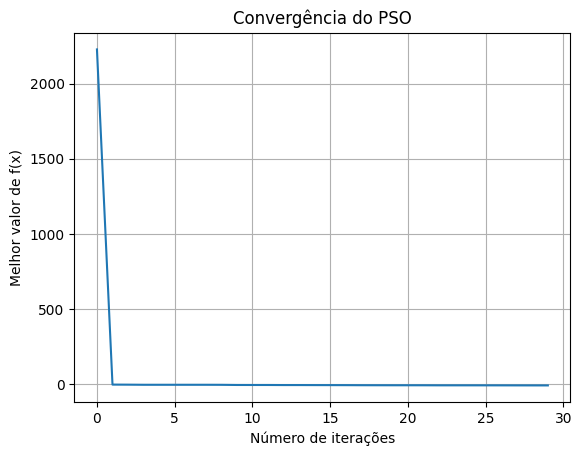

In [ ]:
import random
from sko.PSO import PSO
import matplotlib.pyplot as plt

# Definição da função objetivo
def objective_function(x):
    return 5 * x[0] + 5 * x[1] + 5 * x[2] + 5 * x[3] - 5 * (x[0]**2 + x[1]**2 + x[2]**2 + x[3]**2) - \
           (x[4] + x[5] + x[6] + x[7] + x[8] + x[9] + x[10] + x[11] + x[12])

# Definição das restrições
def restricao_desigualdade1(x):
    return 2 * x[0] + 2 * x[1] + x[9] + x[10] - 10

def restricao_desigualdade2(x):
    return 2 * x[0] + 2 * x[2] + x[9] + x[11] - 10

def restricao_desigualdade3(x):
    return 2 * x[1] + 2 * x[2] + x[10] + x[11] - 10

def restricao_desigualdade4(x):
    return -8 * x[0] + x[9]

def restricao_desigualdade5(x):
    return -8 * x[1] + x[10]

def restricao_desigualdade6(x):
    return -8 * x[2] + x[11]

def restricao_desigualdade7(x):
    return -2 * x[3] - x[4] + x[9]

def restricao_desigualdade8(x):
    return -2 * x[5] - x[6] + x[10]

def restricao_desigualdade9(x):
    return -2 * x[7] - x[8] + x[11]

# Definindo função para penalizar as restrições
def penalty_function(x):
    penalties = [
        max(0, restricao_desigualdade1(x)),
        max(0, restricao_desigualdade2(x)),
        max(0, restricao_desigualdade3(x)),
        max(0, restricao_desigualdade4(x)),
        max(0, restricao_desigualdade5(x)),
        max(0, restricao_desigualdade6(x)),
        max(0, restricao_desigualdade7(x)),
        max(0, restricao_desigualdade8(x)),
        max(0, restricao_desigualdade9(x))
    ]
    return sum(p**2 for p in penalties)

# Modificando a função fitness para incluir as penalidades das restrições
def fitness_function(x):
    return objective_function(x) + penalty_function(x)

# Executando PSO
pso = PSO(func=fitness_function, n_dim=13, pop=50, max_iter=30,
          lb=[0]*13, ub=[1, 1, 1, 1, 1, 1, 1, 1, 1, 100, 100, 100, 1],
          w=0.8, c1=0.5, c2=0.5)
pso.run()

# Imprimindo o melhor resultado encontrado
print('Melhor solução encontrada:', pso.gbest_x)
print('Melhor valor de f(x):', pso.gbest_y)

# Plotando a evolução do valor de f(x) ao longo das iterações
plt.plot(pso.gbest_y_hist)
plt.xlabel('Número de iterações')
plt.ylabel('Melhor valor de f(x)')
plt.title('Convergência do PSO')
plt.grid(True)
plt.show()


